# Assignment 5(due on 12/20)

## Student:陈泽鲲（12332289），Gtihub：Konstantiniyye1
## 批改人：张鹏


## 得分：40/40+15/15

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

/home/zhangp/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1

## 1.1

In [2]:
#load fuel emmision data
CO2_fuel_emmission=pd.read_csv("global.1751_2014.csv")
CO2_fuel_emmission=CO2_fuel_emmission["Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)"]

In [3]:
N1=np.zeros(19)
N2=np.zeros(19)
N1[0]=740
N2[0]=900
for i in range(18):
#define function
    gamma=float(CO2_fuel_emmission.iloc[i+236])*10**-3
    print(gamma)
    def model(y, t):
        y1, y2 = y
        dy1dt = -105/740 * y1 +102/900* y2+ gamma
        dy2dt = 105/740*y1 -102/900* y2
        return [dy1dt, dy2dt]
#give initial values
    y0 = [N1[i], N2[i]]
    t = np.linspace(0, 1, 2)
    y = odeint(model, y0, t)
#get net year values
    N1[i+1]=y[1, 0]
    N2[i+1]=y[1, 1]

5.583
5.7250000000000005
5.936
6.066
6.074
6.142
6.078
6.07
6.174
6.305
6.448
6.556
6.5760000000000005
6.561
6.7330000000000005
6.893
6.994
7.376


## 1.2

In [4]:
N1_buffer=np.zeros(19)
N2_buffer=np.zeros(19)
#set initail values
N1_buffer[0]=740
N2_buffer[0]=900
for i in range(18):
#define function
    gamma=float(CO2_fuel_emmission.iloc[i+236])*10**-3
    buffer_factor=3.69+1.86*10**-2*N1_buffer[i]-1.8*10**-6*N1_buffer[i]**2
    def model(y, t):
        y1, y2 = y
        dy1dt = -105/740 * y1 +102/900* (821+buffer_factor*(y2-821))+ gamma
        dy2dt = 105/740* y1 -102/900* (821+buffer_factor*(y2-821))
        return [dy1dt, dy2dt]
#give initial values
    y0 = [N1_buffer[i], N2_buffer[i]]
    t = np.linspace(0, 1, 2)
    y = odeint(model, y0, t)
#get net year values
    N1_buffer[i+1]=y[1, 0]
    N2_buffer[i+1]=y[1, 1]

# 1.3

Text(0, 0.5, 'CO2 concentration (ppm)')

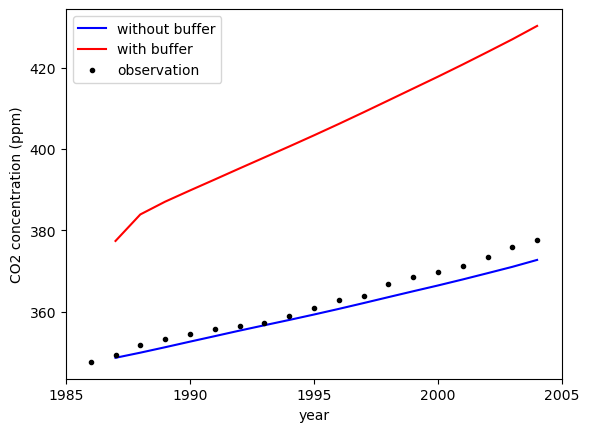

In [5]:
#load observation data,this data have some observation data from co2_annmean_mlo.csv and some smooth data from lawdome.combined.dat
CO2=pd.read_csv("co2.csv")
CO2=CO2.iloc[217:236]
x=np.linspace(1987,2004,18)
#plot
plt.plot(x,N1[1:19]/2.13,'b')
plt.plot(x,N1_buffer[1:19]/2.13,'r')
plt.plot(CO2['year'],CO2['ppm'],'k.')
plt.legend(["without buffer", "with buffer","observation"])
plt.xticks(np.array([1985, 1990, 1995, 2000, 2005]))
plt.xlabel("year")
plt.ylabel("CO2 concentration (ppm)")

### 第一问代码思路和结果正确;
### 第二问代码思路和结果正确;
### 第三问结果正确。
### 得分40/40

## bonus

In [6]:
#load fuel emmission data
CO2_fuel_emmission=pd.read_csv("global.1751_2014.csv")
CO2_fuel_emmission=CO2_fuel_emmission["Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)"]
CO2_fuel_emmission=CO2_fuel_emmission.iloc[1:251]
#load landuse change data, this data is from Global_land-use_flux-1850_2005.xls,and linearly interpolating 1750-1850 from 0.2Pg/year to 
#0.5Pg/year
CO2_landuse_change=pd.read_excel("landuse_1750_2000.xlsx")
CO2_landuse_change=CO2_landuse_change["Global"]
N1_seven=np.zeros(251)
N2_seven=np.zeros(251)
N3_seven=np.zeros(251)
N4_seven=np.zeros(251)
N5_seven=np.zeros(251)
N6_seven=np.zeros(251)
N7_seven=np.zeros(251)
#set initail values
N1_seven[0]=615
N2_seven[0]=842
N3_seven[0]=9744
N4_seven[0]=26280
N5_seven[0]=90000000
N6_seven[0]=731
N7_seven[0]=1328
for i in range(250):
#define function
    gamma=float(CO2_fuel_emmission.iloc[i])*10**-3
    buffer_factor=3.69+1.86*10**-2*N1_seven[i]/2.13-1.8*10**-6*(N1_seven[i]/2.13)**2
    f=62*(1+0.38*np.log(N1_seven[i]/289/2.13))
    delta=CO2_landuse_change.iloc[i]*10**-3
    def model(y, t):
        y1, y2, y3, y4, y5, y6, y7 = y
        dy1dt = -60/615 * y1 +60/842* (842+buffer_factor*(y2-842))+gamma-f+delta+0.2/90000000*y5+62/1328*y7
        dy2dt = 60/615* y1 -60/842* (842+buffer_factor*(y2-842))-9/842*y2+52/9744*y3-43/842*y2
        dy3dt = 9/842*y2 -52/9744*y3 -162/9744*y3 +205/26280*y4
        dy4yt = 162/9744*y3 -205/26280*y4 +43/842*y2 -0.2/26280*y4
        dy5dt = 0.2/26280*y4 -0.2/90000000*y5
        dy6dt = f -62/731*y6 - 2*delta
        dy7dt = 62/731*y6 -62/1328*y7 +delta
        return [dy1dt, dy2dt, dy3dt, dy4yt, dy5dt, dy6dt, dy7dt]
#give initial values
    y0 = [N1_seven[i], N2_seven[i], N3_seven[i], N4_seven[i], N5_seven[i], N6_seven[i], N7_seven[i]]
    t = np.linspace(0, 1, 2)
    y = odeint(model, y0, t)
#get net year values
    N1_seven[i+1]=y[1, 0]
    N2_seven[i+1]=y[1, 1]
    N3_seven[i+1]=y[1, 2]
    N4_seven[i+1]=y[1, 3]
    N5_seven[i+1]=y[1, 4]
    N6_seven[i+1]=y[1, 5]
    N7_seven[i+1]=y[1, 6]


In [7]:
#load fuel emmission data
CO2_fuel_emmission=pd.read_csv("global.1751_2014.csv")
CO2_fuel_emmission=CO2_fuel_emmission["Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)"]
CO2_fuel_emmission=CO2_fuel_emmission.iloc[1:251]
#load landuse change data, this data is from Global_land-use_flux-1850_2005.xls,and linearly interpolating 1750-1850 from 0.2Pg/year to 
#0.5Pg/year
CO2_landuse_change=pd.read_excel("landuse_1750_2000.xlsx")
CO2_landuse_change=CO2_landuse_change["Global"]
N1_seven_05=np.zeros(251)
N2_seven_05=np.zeros(251)
N3_seven_05=np.zeros(251)
N4_seven_05=np.zeros(251)
N5_seven_05=np.zeros(251)
N6_seven_05=np.zeros(251)
N7_seven_05=np.zeros(251)
#set initail values
N1_seven_05[0]=615
N2_seven_05[0]=842
N3_seven_05[0]=9744
N4_seven_05[0]=26280
N5_seven_05[0]=90000000
N6_seven_05[0]=731
N7_seven_05[0]=1328
for i in range(250):
#define function
    gamma=float(CO2_fuel_emmission.iloc[i])*10**-3
    buffer_factor=3.69+1.86*10**-2*N1_seven_05[i]/2.13-1.8*10**-6*(N1_seven_05[i]/2.13)**2
    f=62*(1+0.5*np.log(N1_seven_05[i]/289/2.13))
    delta=CO2_landuse_change.iloc[i]*10**-3
    def model(y, t):
        y1, y2, y3, y4, y5, y6, y7 = y
        dy1dt = -60/615 * y1 +60/842* (842+buffer_factor*(y2-842))+gamma-f+delta+0.2/90000000*y5+62/1328*y7
        dy2dt = 60/615* y1 -60/842* (842+buffer_factor*(y2-842))-9/842*y2+52/9744*y3-43/842*y2
        dy3dt = 9/842*y2 -52/9744*y3 -162/9744*y3 +205/26280*y4
        dy4yt = 162/9744*y3 -205/26280*y4 +43/842*y2 -0.2/26280*y4
        dy5dt = 0.2/26280*y4 -0.2/90000000*y5
        dy6dt = f -62/731*y6 - 2*delta
        dy7dt = 62/731*y6 -62/1328*y7 +delta
        return [dy1dt, dy2dt, dy3dt, dy4yt, dy5dt, dy6dt, dy7dt]
#give initial values
    y0 = [N1_seven_05[i], N2_seven_05[i], N3_seven_05[i], N4_seven_05[i], N5_seven_05[i], N6_seven_05[i], N7_seven_05[i]]
    t = np.linspace(0, 1, 2)
    y = odeint(model, y0, t)
#get net year values
    N1_seven_05[i+1]=y[1, 0]
    N2_seven_05[i+1]=y[1, 1]
    N3_seven_05[i+1]=y[1, 2]
    N4_seven_05[i+1]=y[1, 3]
    N5_seven_05[i+1]=y[1, 4]
    N6_seven_05[i+1]=y[1, 5]
    N7_seven_05[i+1]=y[1, 6]

Text(0, 0.5, 'CO2 concentration (ppm)')

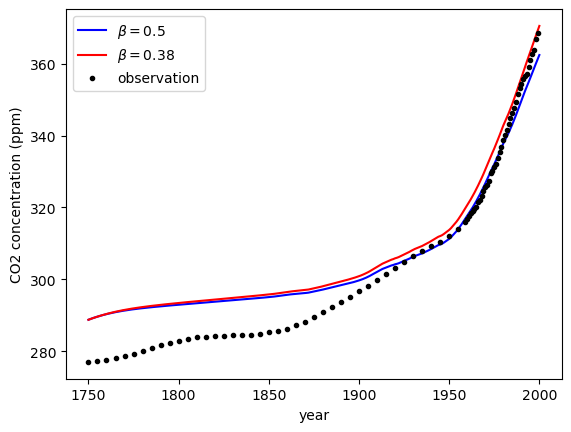

In [8]:
#load observation data,this data have some observation data from co2_annmean_mlo.csv and some smooth data from lawdome.combined.dat
CO2=pd.read_csv("co2.csv")
CO2=CO2.iloc[148:231]
x=np.linspace(1750,2000,251)
#plot
plt.plot(x,N1_seven_05/2.13,'b')
plt.plot(x,N1_seven/2.13,'r')
plt.plot(CO2['year'],CO2['ppm'],'k.')
plt.legend([r'$\beta = 0.5$', r'$\beta = 0.38$','observation'])
plt.xlabel("year")
plt.ylabel("CO2 concentration (ppm)")

### 第三问代码思路和结果基本正确，但注意P0 根据文章APPENDIX应等于290.21，报告分析完整。
### 得分15/15